## 1. Import Libraries 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

## 2. Load Dataset

In [2]:
# load data
df = pd.read_excel('machine_data.xlsx')
df.head(2)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.9,309.1,2861,4.6,143,Power Failure
1,298.9,309.0,1410,65.7,191,Power Failure


## 3. Data Preprocessing

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      355 non-null    float64
 1   Process temperature [K]  355 non-null    float64
 2   Rotational speed [rpm]   355 non-null    int64  
 3   Torque [Nm]              355 non-null    float64
 4   Tool wear [min]          355 non-null    int64  
 5   Failure Type             355 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 16.8+ KB


In [4]:
df['Failure Type'].value_counts()

Heat Dissipation Failure    125
Power Failure                98
Overstrain Failure           82
Tool Wear Failure            50
Name: Failure Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

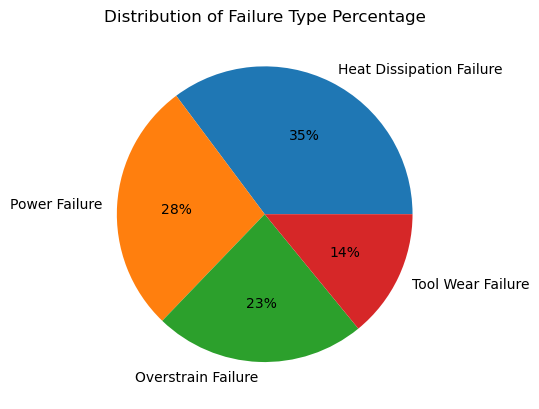

In [5]:
# Generate the number
n = df.shape[0]
df_percentage = 100*df['Failure Type'].value_counts()/df['Failure Type'].shape[0]

# Show Failure Distribution with Pie Chart
plt.title('Distribution of Failure Type Percentage')
plt.pie(x=df_percentage.array, labels=df_percentage.index.array,
       colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
plt.show

### Covert Data Types

In [6]:
# Set numeric columns to float data type
df['Tool wear [min]'] = df ['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

#rename features column
df.rename(mapper={'Air temperature [K]': 'Air temperature',
                  'Process temperature [K]': 'Process temperature',
                  'Rotational speed [rpm]': 'Rotational speed',
                  'Torque [Nm]': 'Torque',
                  'Tool wear [min]': 'Tool wear'
                 }, axis = 1, inplace=True)

### Remove Duplicates

In [7]:
# Check Duplicate Value
df.duplicated().any()

False

In [8]:
# Drop duplicate if exist
# df = df.drop_duplicates()

### Handling Missing Values

In [9]:
# Check Missing Value
df.isnull().sum()

Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure Type           0
dtype: int64

## 4. Data Transformation

### Resampling with SMOTE

SMOTENC (Synthetic Minority Over-sampling Technique) is an over-sampling technique used to balance the class distribution of an imbalanced dataset by generating synthetic samples in the minority class.

SMOTENC uses a nearest neighbors approach to generate synthetic samples, and can be used to balance imbalanced datasets in a variety of classification and regression problems.

In [10]:
from imblearn.over_sampling import SMOTENC

In [11]:
n_working = df['Failure Type'].size
print('n_working: ',n_working)

n_working:  355


In [12]:
desired_length = 500
print('desired_length: ',desired_length)
spc = round(desired_length/4) # sample per class
print('spc: ',spc)

# resampling
balance_cause = {'Overstrain Failure': spc,
                 'Heat Dissipation Failure': spc,
                 'Power Failure': spc,
                 'Tool Wear Failure': spc}

sm = SMOTENC(categorical_features=[0,5], sampling_strategy=balance_cause, random_state=0)
print('SMOTENC: ',sm)
df_res, y_res = sm.fit_resample(df, df['Failure Type'])

desired_length:  500
spc:  125
SMOTENC:  SMOTENC(categorical_features=[0, 5], random_state=0,
        sampling_strategy={'Heat Dissipation Failure': 125,
                           'Overstrain Failure': 125, 'Power Failure': 125,
                           'Tool Wear Failure': 125})


In [13]:
fail_res_percentage = 100*df_res['Failure Type'].value_counts()/df_res.shape[0]

<function matplotlib.pyplot.show(close=None, block=None)>

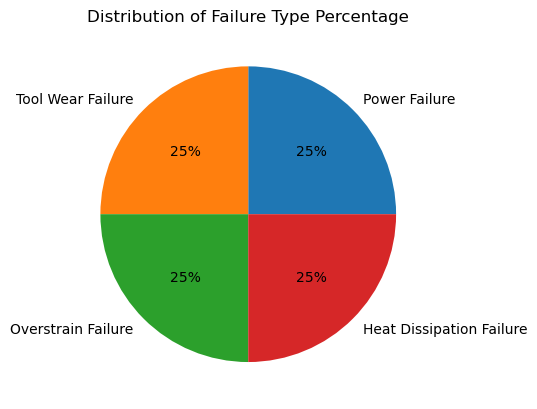

In [14]:
# Show Failure Distribution with Pie Chart

plt.title('Distribution of Failure Type Percentage')
plt.pie(x=fail_res_percentage.array, labels=fail_res_percentage.index.array,
       colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
plt.show

## 4. Data Transformation

###  Label Encoding

In [15]:
cause_dict = {
              "Heat Dissipation Failure": 1,
              "Power Failure": 2,
              "Overstrain Failure": 3,
              "Tool Wear Failure": 4}
df_pre = df_res.copy()
df_pre.head(2)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure Type
0,298.9,309.1,2861.0,4.6,143.0,Power Failure
1,298.9,309.0,1410.0,65.7,191.0,Power Failure


In [16]:
#Encoding
df_pre['Failure Type'].replace(to_replace=cause_dict, inplace=True)
df_pre.head(2)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure Type
0,298.9,309.1,2861.0,4.6,143.0,2
1,298.9,309.0,1410.0,65.7,191.0,2


In [17]:
df_pre['Failure Type'].value_counts()

2    125
4    125
3    125
1    125
Name: Failure Type, dtype: int64

## 5. Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Create list of feature
features = [col for col in df.columns
           if df[col].dtype == 'float64']
features

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [20]:
# Create list of target names
target = ['Failure Type']
target

['Failure Type']

In [21]:
X, y = df_pre[features], df_pre['Failure Type']
X.head(2)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,298.9,309.1,2861.0,4.6,143.0
1,298.9,309.0,1410.0,65.7,191.0


In [22]:
# train-validation-test split
X_train, X_testval, y_train, y_testval = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5,random_state=0)

In [23]:
print("All data: ",len(X)," | ",(len(X)/len(X))*100 ,"%")
print("Train data: ",len(X_train)," | ",round(((len(X_train)/len(X))*100),ndigits=2) ,"%")
print("Test data: ",len(X_test)," | ",round(((len(X_test)/len(X))*100),ndigits=2) ,"%")
print("Val data: ",len(X_val)," | ",round(((len(X_val)/len(X))*100),ndigits=2) ,"%")

All data:  500  |  100.0 %
Train data:  400  |  80.0 %
Test data:  50  |  10.0 %
Val data:  50  |  10.0 %


## 6. Model Training and Evaluation

In [24]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore')

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

Logistic Regression
--------------------------------------------------------
Model Accuracy Score : 84.0 %
Validation Accuracy    : 88.0 %
Training Accuracy    : 89.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.90      0.90      0.90        10
           3       0.76      0.76      0.76        17
           4       0.73      0.89      0.80         9

    accuracy                           0.84        50
   macro avg       0.85      0.85      0.85        50
weighted avg       0.85      0.84      0.84        50

--------------------------------------------------------


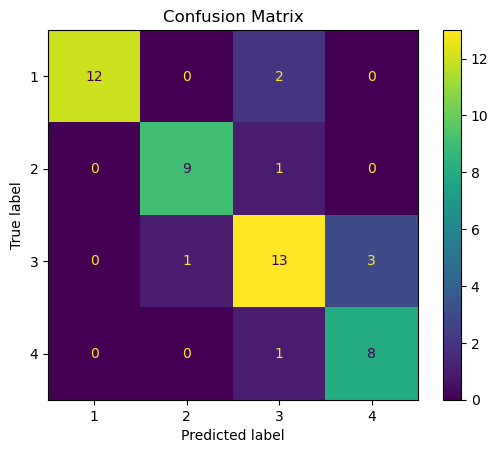

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_val = round(logreg.score(X_val, y_val) * 100, 2)
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Logistic Regression")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Validation Accuracy    :",log_val ,"%")
print("Training Accuracy    :",log_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

K-Nearest Neighbors
--------------------------------------------------------
Model Accuracy Score : 78.0 %
Validation Accuracy    : 80.0 %
Training Accuracy    : 87.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.71      0.50      0.59        10
           3       0.83      0.88      0.86        17
           4       0.80      0.89      0.84         9

    accuracy                           0.78        50
   macro avg       0.77      0.76      0.76        50
weighted avg       0.78      0.78      0.77        50

--------------------------------------------------------


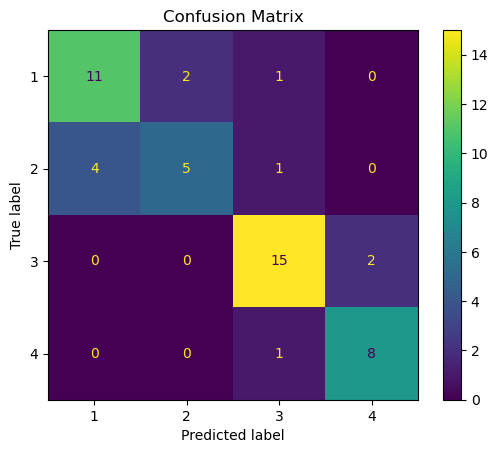

In [27]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_val = round(knn.score(X_val, y_val) * 100, 2)
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("K-Nearest Neighbors")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("Validation Accuracy    :",knn_val ,"%")
print("Training Accuracy    :",knn_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

Support Vector Machines
--------------------------------------------------------
Model Accuracy Score : 74.0 %
Validation Accuracy    : 60.0 %
Training Accuracy    : 63.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.64      0.64      0.64        14
           2       1.00      0.30      0.46        10
           3       0.68      1.00      0.81        17
           4       1.00      0.89      0.94         9

    accuracy                           0.74        50
   macro avg       0.83      0.71      0.71        50
weighted avg       0.79      0.74      0.72        50

--------------------------------------------------------


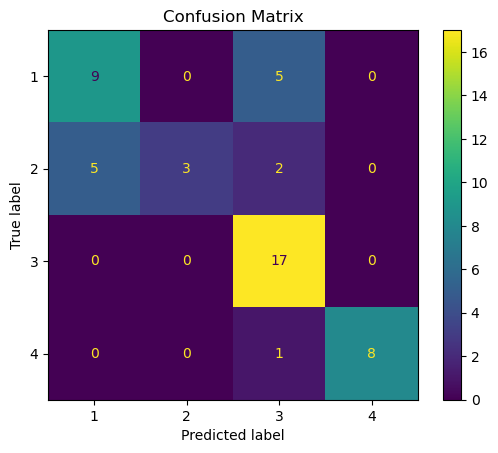

In [28]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_val = round(svc.score(X_val, y_val) * 100, 2)
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Support Vector Machines")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Validation Accuracy    :",svc_val ,"%")
print("Training Accuracy    :",svc_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test);
plt.title('Confusion Matrix');

Decision Tree
--------------------------------------------------------
Model Accuracy Score : 86.0 %
Validation Accuracy    : 90.0 %
Training Accuracy    : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.88      0.70      0.78        10
           3       0.94      0.94      0.94        17
           4       0.89      0.89      0.89         9

    accuracy                           0.86        50
   macro avg       0.86      0.85      0.85        50
weighted avg       0.86      0.86      0.86        50

--------------------------------------------------------


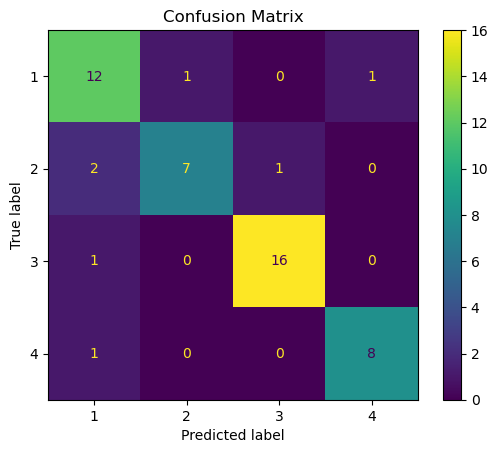

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_val = round(decision.score(X_val, y_val) * 100, 2)
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Decision Tree")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Validation Accuracy    :",decision_val ,"%")
print("Training Accuracy    :",decision_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

Random Forest
--------------------------------------------------------
Model Accuracy Score : 100.0 %
Validation Accuracy    : 90.0 %
Training Accuracy    : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         9

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

--------------------------------------------------------


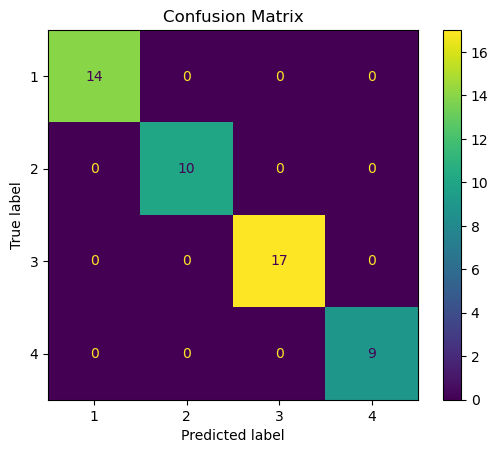

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

rf_val = round(random_forest.score(X_val, y_val) * 100, 2)
rf_train = round(random_forest.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Random Forest")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",rf_accuracy ,"%")
print("Validation Accuracy    :",rf_val ,"%")
print("Training Accuracy    :",rf_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

eXtreme Gradient Boosting
--------------------------------------------------------
Model Accuracy Score : 98.0 %
Validation Accuracy    : 94.0 %
Training Accuracy    : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00         9

    accuracy                           0.98        50
   macro avg       0.98      0.99      0.98        50
weighted avg       0.98      0.98      0.98        50

--------------------------------------------------------


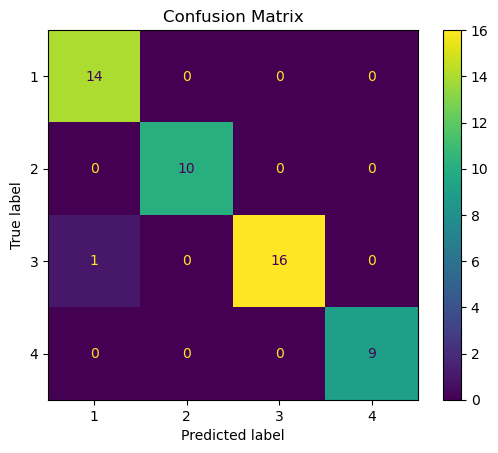

In [31]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_val = round(xgb.score(X_val, y_val) * 100, 2)
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("eXtreme Gradient Boosting")
print("\033[1m--------------------------------------------------------\033[0m")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("Validation Accuracy    :",xgb_val ,"%")
print("Training Accuracy    :",xgb_train ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(xgb, X_test, y_test);
plt.title('Confusion Matrix');

### XGBoost Tree

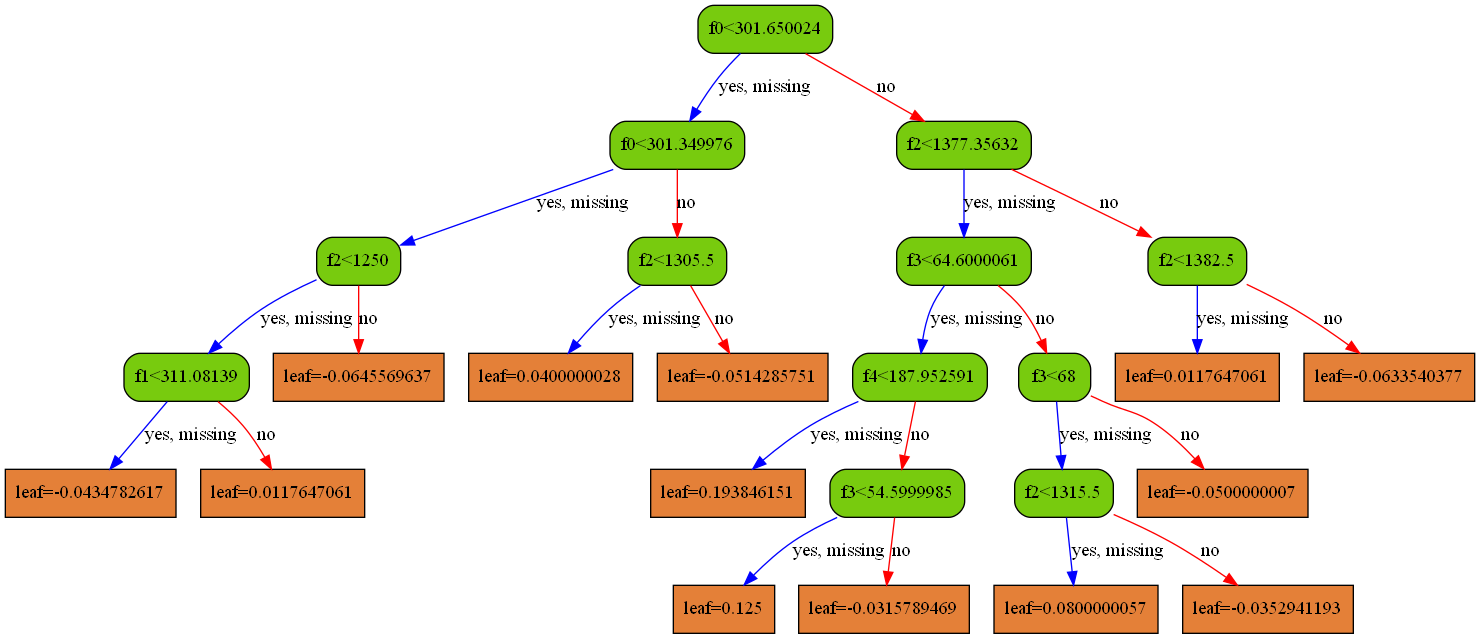

In [32]:
from IPython.display import Image
import xgboost as xgb

# build and fit the XGBoost model
clf_xgb = xgb.XGBClassifier(eval_metric='mlogloss', learning_rate=0.1, 
                            max_depth=5, n_estimators=100, 
                            objective='multi:softprob')
clf_xgb.fit(X_train.values, y_train.values)

# get the first tree of the model
bst = clf_xgb.get_booster()
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box',
              'style': 'filled',
               'fillcolor':'#e48038'}
tree = xgb.to_graphviz(bst, num_trees=0, size="10,10",
                       condition_node_params=node_params,
                       leaf_node_params=leaf_params)

# display the tree
Image(tree.render(format='png'))

### Test New Data

In [33]:
xgb_model = XGBClassifier(eval_metric = 'mlogloss', learning_rate = 0.1, 
                      max_depth = 5, n_estimators = 100, 
                      objective = 'multi:softsprob')

xgb_model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
df_new_train = X_train.copy()
df_new_train['Failure Type'] = y_train
df_new_train.head(2)

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure Type
107,302.1,311.0,1351.0,60.3,207.0,3
336,299.1,309.8,1398.0,55.4,217.0,3


In [35]:
new_data_hdf = [
                [302.2,310.6,1355,51.5,126], # HDF - 1
                [301.8,310.3,1341,50.5,64], # HDF - 1
                [303.3,310.9,1377,46.8,166],
                [301.7,310.2,1331,57.4,40],
                [302,310.4,1212,55.6,79]
               ]
new_data_hdf

[[302.2, 310.6, 1355, 51.5, 126],
 [301.8, 310.3, 1341, 50.5, 64],
 [303.3, 310.9, 1377, 46.8, 166],
 [301.7, 310.2, 1331, 57.4, 40],
 [302, 310.4, 1212, 55.6, 79]]

In [36]:
new_data_pwf = [
                [298.9,309.1,2861,4.6,143], # PWF - 2
                [300.7,310.9,1356,65.3,66], # PWF - 2
                [297.5,308.3,2564,12.8,127],
                [298.8,310.1,1243,74.5,194],
                [298.9,310.2,2737,8.8,142]
               ]
new_data_hdf

[[302.2, 310.6, 1355, 51.5, 126],
 [301.8, 310.3, 1341, 50.5, 64],
 [303.3, 310.9, 1377, 46.8, 166],
 [301.7, 310.2, 1331, 57.4, 40],
 [302, 310.4, 1212, 55.6, 79]]

In [37]:
new_data_osf = [
                [298.5,309.4,1360,60.9,187], # OSF - 3
                [301,311.1,1236,64.4,177], #OSF - 3
                [299,310.4,1365,49.1,226],
                [300.5,309.3,1299,65.1,212],
                [302.7,312.4,1477,46.3,251]
               ]
new_data_osf

[[298.5, 309.4, 1360, 60.9, 187],
 [301, 311.1, 1236, 64.4, 177],
 [299, 310.4, 1365, 49.1, 226],
 [300.5, 309.3, 1299, 65.1, 212],
 [302.7, 312.4, 1477, 46.3, 251]]

In [38]:
new_data_twf = [
                [298.8,308.9,1455,41.3,208], # TWF - 4
                [300.5,309.9,1397,45.9,210], # TWF - 4
                [301,311.1,1236,64.4,177],
                [302.2,311.3,1530,37.3,207],
                [299.6,309.2,1867,23.4,225]
               ]
new_data_twf

[[298.8, 308.9, 1455, 41.3, 208],
 [300.5, 309.9, 1397, 45.9, 210],
 [301, 311.1, 1236, 64.4, 177],
 [302.2, 311.3, 1530, 37.3, 207],
 [299.6, 309.2, 1867, 23.4, 225]]

In [39]:
ft_name = ['HD Fail','PW Fail','OS Fail','TW Fail']
ft_name

['HD Fail', 'PW Fail', 'OS Fail', 'TW Fail']

In [40]:
# Combine data
ft = [new_data_hdf,new_data_pwf ,new_data_osf ,new_data_twf ]
ft

[[[302.2, 310.6, 1355, 51.5, 126],
  [301.8, 310.3, 1341, 50.5, 64],
  [303.3, 310.9, 1377, 46.8, 166],
  [301.7, 310.2, 1331, 57.4, 40],
  [302, 310.4, 1212, 55.6, 79]],
 [[298.9, 309.1, 2861, 4.6, 143],
  [300.7, 310.9, 1356, 65.3, 66],
  [297.5, 308.3, 2564, 12.8, 127],
  [298.8, 310.1, 1243, 74.5, 194],
  [298.9, 310.2, 2737, 8.8, 142]],
 [[298.5, 309.4, 1360, 60.9, 187],
  [301, 311.1, 1236, 64.4, 177],
  [299, 310.4, 1365, 49.1, 226],
  [300.5, 309.3, 1299, 65.1, 212],
  [302.7, 312.4, 1477, 46.3, 251]],
 [[298.8, 308.9, 1455, 41.3, 208],
  [300.5, 309.9, 1397, 45.9, 210],
  [301, 311.1, 1236, 64.4, 177],
  [302.2, 311.3, 1530, 37.3, 207],
  [299.6, 309.2, 1867, 23.4, 225]]]

In [41]:
# Predicting
print("PREDICTION SUMMARY:\n")
for i in range (0,4):
    test_predictions_all = xgb_model.predict(ft[i])
    print(ft_name[i],"\t:",test_predictions_all)
    correct_no = 0
    for j in test_predictions_all:
        #print(test_predictions_all[i])
        if ft_name[i] == ft_name[i] and test_predictions_all[j] == j :
            correct_no += 1
            #print(ft_name[i]," prediction success")
        #else:
            #print(ft_name[i]," prediction failed")
    print(
          "Success Rate\t:",
          "(%s/%s) \t"%(correct_no,len(test_predictions_all)),
          correct_no/len(test_predictions_all)*100,"%",
         )

PREDICTION SUMMARY:

HD Fail 	: [1 1 1 1 1]
Success Rate	: (5/5) 	 100.0 %
PW Fail 	: [2 2 2 2 2]
Success Rate	: (5/5) 	 100.0 %
OS Fail 	: [3 3 3 3 3]
Success Rate	: (5/5) 	 100.0 %
TW Fail 	: [4 4 3 4 4]
Success Rate	: (4/5) 	 80.0 %


## 7. Model Deployment

### Save Model

In [42]:
import joblib

In [43]:
xgb_model = XGBClassifier(eval_metric = 'mlogloss', learning_rate = 0.1, 
                      max_depth = 5, n_estimators = 100, 
                      objective = 'multi:softsprob')

xgb_model.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [44]:
#  If you’d like to store or archive your model for long-term storage

xgb_model.save_model('adis_model_xgboost.pkl')

In [45]:
# save feature columns name

feature_col = list(X_train.columns)
joblib.dump(feature_col,'adis_col_names.pkl')

['adis_col_names.pkl']

In [46]:
new_columns = joblib.load('adis_col_names.pkl')
new_columns

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

In [47]:
# load model
loaded_xgb_model = XGBClassifier()
loaded_xgb_model.load_model('adis_model_xgboost.pkl')
loaded_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='auto', validate_parameters=1,
              verbosity=None)

In [48]:
new_data_all = [
                [302.2,310.6,1355,51.5,126], # HDF - 1
                [300.7,310.9,1356,65.3,66], # PWF - 2
                [298.5,309.4,1360,60.9,187], # OSF - 3
                [298.8,308.9,1455,41.3,208], # TWF - 4
              ]
new_data_all

[[302.2, 310.6, 1355, 51.5, 126],
 [300.7, 310.9, 1356, 65.3, 66],
 [298.5, 309.4, 1360, 60.9, 187],
 [298.8, 308.9, 1455, 41.3, 208]]

In [49]:
# Predicting
test_predictions_all = loaded_xgb_model.predict(new_data_all)
test_predictions_all

array([1, 2, 3, 4])